# Programming Assignment \#1
## Miguel A. Gonzalez Jimenez - 502221027


# Introduction

Local search algorithms are used to find a solution to a problem by starting at a predetermined initial state and then modifying the state until the goal state is attained [1]. A neighborhood is the set of all potential solutions that differ from the current solution by the smallest amount possible. A local search algorithm begins with a candidate solution and iteratively moves to a neighbor solution. To accomplish this, a neighborhood relation must be established on the search space [2]. Local changes are made as local search algorithms move from solution to solution in the space of candidate solutions (the search space) until an optimal solution is discovered or the time limit is reached [3]. A local search algorithm's main benefit is that it frequently solves issues faster than other kinds of algorithms [4].

Hill climbing is a local search algorithm that keeps going uphill (increasing) until it finds the best solution. It is an Artificial Intelligence (AI) algorithm whose value keeps rising until it finds the best solution [5]. This algorithm is used in real-world applications like marketing and job scheduling [6] as well as to optimize mathematical problems. Hill climbing aims to maximize (or minimize) a target function, where f(x) is a vector of discrete or continuous values [7]. The problem's global optimum may not be found by Hill Climbing, though, because it occasionally gets stuck in local optima. The algorithm is sensitive to the initial solution selected, and a subpar initial solution might lead to a subpar final solution [8].

Simulated annealing is an algorithm that mimics the real-world annealing procedure used in metallurgy. Physical annealing involves heating the metal to its annealing temperature before gradually cooling it to form the desired shape [9]. Simulated annealing, though it typically only yields an approximation of the global minimum, may be sufficient for many real-world issues where exact algorithms fail to solve extremely challenging computational optimization problems [10]. The approach simulates the actual physical procedure of raising a material's temperature and then gradually lowering it to reduce defects, thereby consuming as little energy as possible [11]. Due to the fact that other local search algorithms do not perform well for nonlinear objective functions, the algorithm is suitable for these functions.

In this report, we will demonstrate how to solve the 8-queens and 8-puzzle problems using both of these algorithms.

# Theoretical Background

The solution to the eight queens puzzle necessitates that no two chess queens occupy the same row, column, or diagonal in order to ensure that no two queens pose a threat to one another [12]. The problem was initially raised in the middle of the 19th century [13]. The n queens problem places n queens on an n×n chessboard. Despite its apparent simplicity, the 8-queens problem is still difficult to solve, and numerous algorithms, including brute-force search, genetic algorithms, simulated annealing, and backtracking, have been suggested to do so. The 8-queens problem is a good illustration of a practical issue that can be transformed into a combinatorial optimization issue and resolved by a variety of optimization methods.

The sliding puzzle known as the "n puzzle" is made up of a frame filled with numbered square tiles that are arranged randomly and have one tile missing. By making sliding moves that take advantage of the available space, the puzzle's goal is to arrange the tiles in the correct order. A generalization of the 8 puzzle game, n can be any integer greater than 2 in the n puzzle game [14]. The game has served as a test case for computer algorithms designed to find solutions to issues like determining the shortest path between two points. The n-puzzle game is not only a fun and difficult pastime for people, but it also provides an ideal environment for the creation and evaluation of search and artificial intelligence algorithms. The puzzle's complexity rises exponentially with the value of n, making it the perfect subject for research into the efficacy and efficiency of various approaches to solving combinatorial and optimization problems. The n-puzzle game is commonly solved using popular algorithms like A*, IDA*, and BFS (Breadth-First Search). Research into the n-puzzle game has advanced not only our comprehension of these algorithms but also more general areas like robotics, path planning, and decision-making systems.

# Import AIMA classes
First, we need to import the classes and functions from the AIMA repository

In [6]:
from aima3.search import EightPuzzle, Problem, hill_climbing, simulated_annealing, exp_schedule, Node
from aima3.utils import *

def first_choice_hill_climbing(problem, max_attempts=1000):
    current = Node(problem.initial)
    for _ in range(max_attempts):
        neighbors = current.expand(problem)
        if not neighbors:
            break
        better_neighbors = [neighbor for neighbor in neighbors if problem.value(neighbor.state) > problem.value(current.state)]
        if not better_neighbors:
            break
        current = random.choice(better_neighbors)
    return current.state

# Defining the necessary classes
In order to solve the problem using the tools provided by the AIMA repository, we need to implement the corresponding classes for N-Queens given that the EightPuzzle class is already implemented. We need to do this because both functions (hill climbing and simulated annealing) recieve an instance of Problem and we want to reuse them. 
Even though the EightPuzzle class is implemented, we still have to define the value function. For this function we will use the manhattan distance heuristic.

In [7]:
class NQueensProblem(Problem):
    def __init__(self, N):
        self.N = N
        initial = tuple(random.randint(0, N - 1) for _ in range(N))
        Problem.__init__(self, initial)

    def actions(self, state):
        return [(i, j) for i in range(self.N) for j in range(self.N) if state[i] != j]

    def result(self, state, action):
        new_state = list(state)
        new_state[action[0]] = action[1]
        return tuple(new_state)

    def value(self, state):
        num_attacks = 0
        for i in range(self.N):
            for j in range(i + 1, self.N):
                if state[i] == state[j] or abs(i - j) == abs(state[i] - state[j]):
                    num_attacks += 1
        return -num_attacks

    def goal_test(self, state):
        return self.value(state) == 0
    
    
class CustomEightPuzzle(EightPuzzle):
    def manhattan_distance(self, state):
        distance = 0
        for i, tile in enumerate(state):
            if tile != 0:
                row, col = divmod(i, 3)
                goal_row, goal_col = divmod(tile - 1, 3)
                distance += abs(row - goal_row) + abs(col - goal_col)
        return distance

    def value(self, state):
        return -self.manhattan_distance(state)

# Defining function implementations
Now we need too define the functions to implement the solutions using the specified algorithms. In this case, we needed 3 functions for each problem: 


In [8]:
def random_board():
    board = list(range(9))
    random.shuffle(board)
    return tuple(board)

# This can be done because the 8-queens problem is NP-Complete and can be verified in polinomial tyme
def solvable_board(board):
    inversions = 0
    for i in range(8):
        for j in range(i+1, 9):
            if board[i] != 0 and board[j] != 0 and board[i] > board[j]:
                inversions += 1
    return inversions % 2 == 0

def random_solvable_board():
    board = random_board()
    while not solvable_board(board):
        board = random_board()
    return board


def solve_8_puzzle_hill_climbing():
    problem = CustomEightPuzzle(initial=random_solvable_board())
    solution = hill_climbing(problem)
    if problem.goal_test(solution):
        return solution
    return None

def solve_8_queens_hill_climbing():
    problem = NQueensProblem(8)

    solution = hill_climbing(problem)

    if problem.goal_test(solution):
        return solution
    else:
        return None


def solve_8_puzzle_simulated_annealing():
    problem = CustomEightPuzzle(initial=random_solvable_board())
    schedule = exp_schedule(k=20, lam=0.005, limit=1000)
    solution = simulated_annealing(problem, schedule)
    if problem.goal_test(solution):
        return solution
    return None


def solve_8_queens_simulated_annealing():
    problem = NQueensProblem(8)
    schedule = exp_schedule(k=20, lam=0.005, limit=1000)
    solution = simulated_annealing(problem, schedule)
    if problem.goal_test(solution):
        return solution
    return None


def solve_8_puzzle_first_choice_hill_climbing():
    problem = CustomEightPuzzle(initial=random_solvable_board())
    solution = first_choice_hill_climbing(problem)
    if problem.goal_test(solution):
        return solution
    return None

def solve_8_queens_first_choice_hill_climbing(N):
    problem = NQueensProblem(N)
    solution = first_choice_hill_climbing(problem)
    if problem.goal_test(solution):
        return solution
    return None


# Experiment setup
For this experiment, we run several instances of a randomized setup for each one of the problems. In most cases the algorithms did not find a solution for the problem

In [9]:

# Helper function to be able to present the solution found for the 8-queens problem
def visualize_solution(solution):
    n = len(solution)
    board = [["_" for _ in range(n)] for _ in range(n)]
    
    for row, col in enumerate(solution):
        board[row][col] = "Q"

    for row in board:
        print(" ".join(row))

def visualize_solution_8_puzzle(solution):
    if solution is None:
        print("No solution found")
        return
    
    state = solution.state
    for i in range(0, 9, 3):
        print(" ".join(str(x) for x in state[i:i+3]))
        
# 8-queen problem solutions
n_queens_simulated_count_solutions = 0
for i in range(int(1e4)):
    solution = solve_8_queens_simulated_annealing()
    if solution is not None:
        n_queens_simulated_count_solutions += 1
        
n_queens_hill_count_solutions = 0
for i in range(int(1e4)):
    solution = solve_8_queens_hill_climbing()
    if solution is not None:
        n_queens_hill_count_solutions += 1

n_queens_hill_first_choice_solutions = 0
for i in range(int(1e4)):
    solution = solve_8_queens_hill_climbing()
    if solution is not None:
        n_queens_hill_first_choice_solutions += 1

# 8-puzzle problem solutions
        
n_puzzle_simulated_count_solutions = 0
for i in range(int(1e4)):
    solution = solve_8_queens_simulated_annealing()
    if solution is not None:
        n_puzzle_simulated_count_solutions += 1

        
n_puzzle_hill_count_solutions = 0
for i in range(int(1e4)):
    solution = solve_8_queens_hill_climbing()
    if solution is not None:
        n_puzzle_hill_count_solutions += 1

n_puzzle_hill_first_choice_solutions = 0
for i in range(int(1e4)):
    solution = solve_8_queens_hill_climbing()
    if solution is not None:
        n_puzzle_hill_first_choice_solutions += 1
# print(f'Got a solution a {(count_solutions/total_tries)*100}% of the time.')


# print("Hill Climbing:")
# solution_hc = solve_8_puzzle_hill_climbing()
# visualize_solution_8_puzzle(solution_hc)

# print("\nSimulated Annealing:")
# solution_sa = solve_8_puzzle_simulated_annealing()
# visualize_solution_8_puzzle(solution_sa)

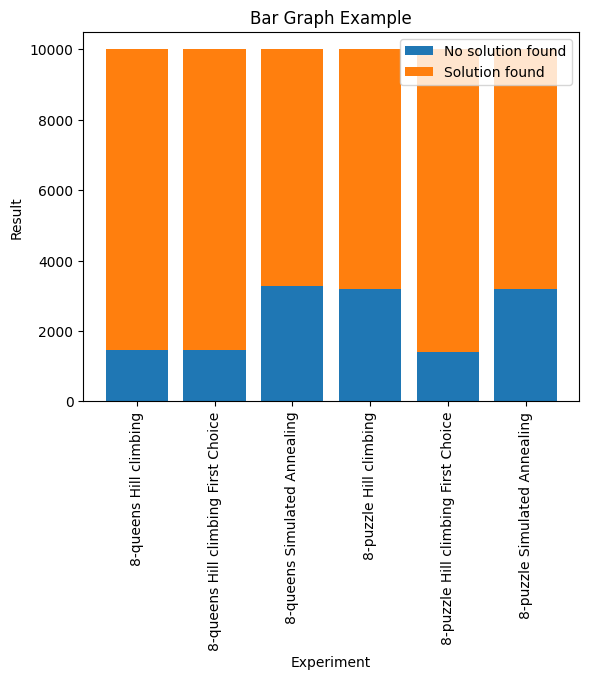

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
categories = ['8-queens Hill climbing', '8-queens Hill climbing First Choice', '8-queens Simulated Annealing', '8-puzzle Hill climbing', '8-puzzle Hill climbing First Choice', '8-puzzle Simulated Annealing']
values_1 = [n_queens_hill_count_solutions, n_queens_hill_first_choice_solutions, n_queens_simulated_count_solutions, n_puzzle_simulated_count_solutions, n_puzzle_hill_first_choice_solutions, n_puzzle_simulated_count_solutions]
values_2 = [(10000 - x) for x in values_1]

# Calculate the position of each bar on the x-axis
x = np.arange(len(categories))

# Create the bar chart
plt.bar(categories, values_1, label='No solution found')
plt.bar(categories, values_2, bottom=values_1, label='Solution found')

# Add labels and title
plt.xlabel('Experiment')
plt.ylabel('Result')
plt.title('Bar Graph Example')
plt.xticks(range(len(categories)), categories, rotation='vertical')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [119]:
# Calculating percentages of solution founds
for i,cat in enumerate(categories):
    print(f'For "{cat}", the percentage of success is -> {round((values_1[i]/10000)*100,2)}%')
    

For "8-queens Hill climbing", the percentage of success is -> 13.68%
For "8-queens Hill climbing First Choice", the percentage of success is -> 14.16%
For "8-queens Simulated Annealing", the percentage of success is -> 31.99%
For "8-puzzle Hill climbing", the percentage of success is -> 32.3%
For "8-puzzle Hill climbing First Choice", the percentage of success is -> 13.55%
For "8-puzzle Simulated Annealing", the percentage of success is -> 32.3%


# Conclusion and results
In this report we could implement a solution for 8-queens and 8-puzzle game using 3 different local search algorithms: Hill climbing, Hill climbing first-choice variant and Simulated annealing.
After running the simulations we demonstrated that both problems (8-queens and 8-puzzle) can, in fact, be solved using local search algorithms, but it's not an efficient way to attack them. For both problems we obtain similar results using the two variants of Hill climbing and Simulated Annealing: 14~% of success rate for hill climbing and 31~% of success rate for simulated annealing. However it is important to notice that even though Simulated annealing presented an improvement in success ratio, the trade-off is in speed. In all runs, hill climbing out-performed simulated annealing in processing time.

# References
(1) Local Search Algorithms In Artificial Intelligence – Surfactants. https://www.surfactants.net/local-search-algorithms-in-artificial-intelligence/.

(2) Local search (optimization) - Wikipedia. https://en.wikipedia.org/wiki/Local_search_(optimization).

(3) Local Search Algorithms and Optimization Problem - TAE. https://www.tutorialandexample.com/local-search-algorithms-and-optimization-problem.

(4) Local search algorithms - Donald Bren School of Information and .... https://www.ics.uci.edu/~rickl/courses/cs-171/cs171-lecture-slides/2020_SS1_CS171/chap_4_Local_Search.pdf.

(5) Understanding Hill Climbing Algorithm in Artificial Intelligence - Section. https://www.section.io/engineering-education/understanding-hill-climbing-in-ai/.

(6) Hill climbing - Wikipedia. https://en.wikipedia.org/wiki/Hill_climbing.

(7) Introduction to Hill Climbing | Artificial Intelligence - GeeksForGeeks. https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/.

(8) Hill Climbing Algorithm in AI - Javatpoint. https://www.javatpoint.com/hill-climbing-algorithm-in-ai.

(9) Simulated annealing - Wikipedia. https://en.wikipedia.org/wiki/Simulated_annealing.

(10) Simulated Annealing - OpenGenus IQ: Computing Expertise & Legacy. https://iq.opengenus.org/simulated-annealing/.

(11) Simulated Annealing - MATLAB & Simulink - MathWorks. https://www.mathworks.com/discovery/simulated-annealing.html.

(12) Eight queens puzzle - Wikipedia. https://en.wikipedia.org/wiki/Eight_queens_puzzle.

(13) 8 queen problem - GeeksforGeeks. https://www.geeksforgeeks.org/8-queen-problem/.

(14) N-Puzzle - Tristan Penman. https://tristanpenman.com/demos/n-puzzle/.

